<a href="https://colab.research.google.com/github/S-Malek/ColabNotes/blob/master/GAN_ITM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!git clone https://github.com/MaryamRaygan/Music.git

fatal: destination path 'Music' already exists and is not an empty directory.


In [52]:
!ls Music/Avaz

Avaz  Dastgah  dataset-metadata.json  README.md  SoundSamples


In [0]:
!pip install ffmpeg
!pip install Audiosegment
from IPython.display import clear_output

!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
import pydub
from pydub import AudioSegment
from pydub.utils import which
AudioSegment.converter = which("ffmpeg")

import glob as glob
import os

try:
  os.mkdir('Data/')
except:
  x=0
  
try:
  os.mkdir('Data/Music')
except:
  x=0
  
try:
  os.mkdir('Data/Music/SoundSamples')
except:
  x=0
  
c=0
for filename in glob.glob('Music/SoundSamples/*.mp3'):
  sound = pydub.AudioSegment.from_file(filename)
  sound.export('Data/'+filename+'.wav', format="wav")
  c+=1
  if c%10==0:
    clear_output()
    print(int((c*100)/1137))
  
clear_output()

In [17]:
from IPython.display import clear_output

!pip install kaggle
!mkdir .kaggle
!touch .kaggle/kaggle.json
api_token = {"username":"sabermalek","key":"d950652f2c64583269011dda5d37c940"}
import json
import os
clear_output()
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json


Data package template written to: Music/dataset-metadata.json


In [79]:
import zipfile
with zipfile.ZipFile('s.zip', 'w') as myzip:
  for i in range(len(sorted(glob.glob('Data/Music/SoundSamples/*.wav')))):
    myzip.write(sorted(glob.glob('Data/Music/SoundSamples/*.wav'))[i])
    if i%50==0:
      clear_output()
      print(i)
  myzip.write('Music/Avaz/Class.txt')
  myzip.write('Music/Avaz/Label.txt')
  myzip.write('Music/Dastgah/Class.txt')
  myzip.write('Music/Dastgah/Label.txt')

1100


In [0]:
from IPython.display import clear_output

!pip install kaggle
!mkdir .kaggle
!touch .kaggle/kaggle.json
api_token = {"username":"sabermalek","key":"1c35c4e41d95e3fce6d410312fe0836d"}
import json
import zipfile
import os
clear_output()
with open('.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 .kaggle/kaggle.json

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d sabermalek/iranian-traditional-music

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 7, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.6/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.6/dist-packages/kaggle/api/kaggle_api_extended.py", line 113, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [0]:
import zipfile
zip_ref = zipfile.ZipFile('s.zip', 'r')
zip_ref.extractall('zipextract')
zip_ref.close()
!ls zipextract/Data/Music/SoundSamples

In [68]:
!kaggle datasets init -p ./

Data package template written to: ./dataset-metadata.json


In [92]:
%%writefile ./dataset-metadata.json
{
  "title": "Iranian Dastgah Music MalekzadeH",
  "id": "sabermalek/iranian-Dastgah-music",
  "licenses": [
{
 "name": "CC0-1.0"
    }
   ]
 }

Overwriting ./dataset-metadata.json


In [93]:
!kaggle datasets create -u -p ./

Starting upload for file .config
Skipping: .config
Starting upload for file sample_data
Skipping: sample_data
Starting upload for file zipextract
Skipping: zipextract
Starting upload for file .kaggle
Skipping: .kaggle
Starting upload for file s.zip
100% 16.4G/16.4G [02:29<00:00, 117MB/s]
Upload successful: s.zip (16GB)
Starting upload for file Music
Skipping: Music
Starting upload for file Data
Skipping: Data
Your public Dataset is being created. Please check progress at https://www.kaggle.com/sabermalek/iranian-dastgah-music


In [0]:
for infile in sorted(glob.glob('Data/Music/SoundSamples/*.wav')):
    print(infile)
    
clear_output()

In [6]:
%reset

import glob as glob
import scipy.io.wavfile
import numpy as np

f=open('Music/Dastgah/Label.txt','r')
classes=f.readlines()
for i in range(len(classes)):
  classes[i]=classes[i].split()[0]
  
names=[]
labs=[]
sounds=[]
c=0
from IPython.display import clear_output
for filename in sorted(glob.glob('Data/Music/SoundSamples/*.wav')):
  
  c+=1
  if c%10==0:
    clear_output()
    print(c)
  
  str1=filename[24:30]
  for i in range(len(classes)):
    if i%2==0:
      if str1==classes[i]:
#         print(str1)
        labs.append(int(classes[i+1]))
        names.append(str1)
  rate,data=scipy.io.wavfile.read(filename)
  sadra0=data
  data=data[:,0]
  sadra=data
  if len(data)>1000000:
    data=data[0:1000000]
    data=list( data[i] for i in range(0,len(data),5))
  else:
    result = np.zeros(1000000)
    result[:data.shape[0]] = data
    data=result
    data=list( data[i] for i in range(0,len(data),5))
    saber=data
  sounds.append(data)
  data=[]

1130


In [32]:
print(sadra.shape)
import numpy as np
saber=np.array(saber)
print(saber.shape)

(1000000,)
(200000,)


In [0]:
import numpy as np
sounds=np.array(sounds)
labs=np.array(labs)
names=np.array(names)
sounds.shape

(1137, 200000)

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls 'drive/My Drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Colab Notebooks'	  s12.jpg
 Elaheh			  s25s200.gif
 Elham2-DNAMutation.mp3   s27.gif
 filter			  social.mp3
 ITM74.plk		  VeryPrivate
 ITM.plk		 'تحریم شکن — Converted from Classic Sites.gsite'
 Other


In [0]:
import pickle as plk
with open('drive/My Drive/ITM.plk', 'wb') as fn:
  plk.dump((sounds,labs,names),fn)

In [0]:
c=0
for j in range(7):
  c=0
  for i in range(len(labs)):
    if (labs[i]==j):
      c+=1
    
  print(c)

445
173
150
74
106
94
95


In [0]:
sounds1=[]
labs1=[]
names1=[]
for j in range(7):
  for i in range(len(sounds)):
    if labs[i]==j and len(labs1)<((j+1)*74):
      sounds1.append(sounds[i])
      labs1.append(labs[i])
      names1.append(names[i])
      
print(len(labs1))

518


In [0]:
c=0
for j in range(7):
  c=0
  for i in range(len(labs1)):
    if (labs1[i]==j):
      c+=1
    
  print(c)

74
74
74
74
74
74
74


In [0]:
import pickle as plk
with open('drive/My Drive/ITM74.plk', 'wb') as fn:
  plk.dump((sounds1,labs1,names1),fn)

In [0]:
import pickle as plk
sounds1,labs1,names1 = plk.load( open( "drive/My Drive/ITM74.plk", "rb" ) )

In [0]:
import numpy as np
sounds=np.array(sounds1)
labs=np.array(labs1)
names=np.array(names1)
print(sounds.shape)
print(labs.shape)

(518, 200000)
(518,)


/usr/local/lib/python3.6/dist-packages/librosa/core/spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


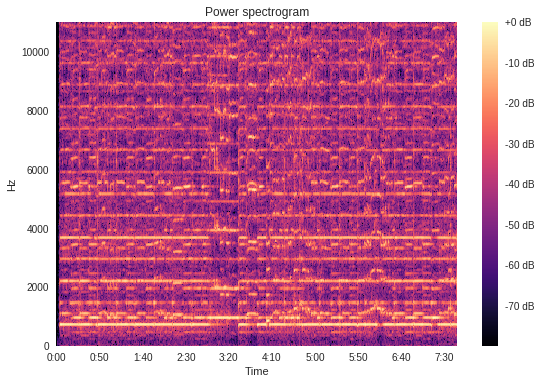

In [0]:
!pip install librosa
import librosa
import librosa.core as lc
import librosa.display
clear_output()
n_f=600
hl=10
st = lc.stft(sounds[0],n_fft=n_f,hop_length=hl)

import matplotlib.pyplot as plt
librosa.display.specshow(librosa.amplitude_to_db(st,
                          ref=np.max),
                          y_axis='linear', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [0]:
import scipy.io.wavfile
# scipy.io.wavfile.write('drive/My Drive/0.wav',44100,sadra0)
# scipy.io.wavfile.write('drive/My Drive/1.wav',44100,sadra)
import numpy as np
saber=np.array(saber)
scipy.io.wavfile.write('drive/My Drive/2.wav',14700,saber)

In [0]:
plt.(sounds1)

In [0]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling1D, Conv1D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import numpy as np

class ACGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 200000
#         self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.channels)
        self.num_classes = 7
        self.latent_dim = 64

        optimizer = Adam(0.0002, 0.5)
        losses = ['binary_crossentropy', 'sparse_categorical_crossentropy']

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss=losses,
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise and the target label as input
        # and generates the corresponding digit of that label
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        img = self.generator([noise, label])

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated image as input and determines validity
        # and the label of that image
        valid, target_label = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model([noise, label], [valid, target_label])
        self.combined.compile(loss=losses,
            optimizer=optimizer)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(64, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((64, 1)))
#         model.add(BatchNormalization(momentum=0.8))
        model.add(UpSampling1D(5))
        model.add(Conv1D(128, kernel_size=3, padding="same", activation='relu'))
#         model.add(BatchNormalization(momentum=0.8))
        model.add(UpSampling1D(5))
        model.add(Conv1D(64, kernel_size=3, padding="same", activation='relu'))
#         model.add(BatchNormalization(momentum=0.8))
        model.add(UpSampling1D(5))
        model.add(Conv1D(32, kernel_size=3, padding="same", activation='relu'))
#         model.add(BatchNormalization(momentum=0.8))
        model.add(UpSampling1D(5))
        model.add(Conv1D(16, kernel_size=3, padding="same", activation='relu'))
#         model.add(BatchNormalization(momentum=0.8))
        model.add(UpSampling1D(5))
        model.add(Conv1D(self.channels, kernel_size=3, padding='same'))
        model.add(Activation("tanh"))
    
        model.summary()

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, 64)(label))

        model_input = multiply([noise, label_embedding])
        img = model(model_input)

        return Model([noise, label], img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Conv1D(16, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv1D(32, kernel_size=3, strides=2, padding="same"))
#         model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Conv1D(64, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Conv1D(128, kernel_size=3, strides=1, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))

        model.add(Flatten())
        model.summary()

        img = Input(shape=self.img_shape)

        # Extract feature representation
        features = model(img)

        # Determine validity and label of the image
        validity = Dense(1, activation="sigmoid")(features)
        label = Dense(self.num_classes+1, activation="softmax")(features)

        return Model(img, [validity, label])

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
#         (X_train, y_train), (_, _) = mnist.load_data()
        X_train=sounds
        y_train=labs

        # Configure inputs
#         X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        X_train = np.expand_dims(X_train, axis=2)
        y_train = y_train.reshape(-1, 1)
        print(X_train)
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, 100))

            # The labels of the digits that the generator tries to create an
            # image representation of
            sampled_labels = np.random.randint(0, self.num_classes, (batch_size, 1))

            # Generate a half batch of new images
            gen_imgs = self.generator.predict([noise, sampled_labels])

            # Image labels. 0-6 if image is valid or 7 if it is generated (fake)
            img_labels = y_train[idx]
            fake_labels = self.num_classes * np.ones(img_labels.shape)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, [valid, img_labels])
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, [fake, fake_labels])
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator
            g_loss = self.combined.train_on_batch([noise, sampled_labels], [valid, sampled_labels])

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%, op_acc: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[3], 100*d_loss[4], g_loss[0]))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.save_model()
#                 self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 10, 10
        noise = np.random.normal(0, 1, (r * c, 100))
        sampled_labels = np.array([num for _ in range(r) for num in range(c)])
        gen_imgs = self.generator.predict([noise, sampled_labels])
        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt,:,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images/%d.png" % epoch)
        plt.close()

    def save_model(self):

        def save(model, model_name):
            model_path = "saved_model/%s.json" % model_name
            weights_path = "saved_model/%s_weights.hdf5" % model_name
            options = {"file_arch": model_path,
                        "file_weight": weights_path}
            json_string = model.to_json()
            open(options['file_arch'], 'w').write(json_string)
            model.save_weights(options['file_weight'])

        save(self.generator, "generator")
        save(self.discriminator, "discriminator")


if __name__ == '__main__':
    acgan = ACGAN()
    acgan.train(epochs=14000, batch_size=32, sample_interval=200)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 100000, 16)        64        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100000, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100000, 16)        0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50000, 32)         1568      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 50000, 32)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50000, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50000, 32)         128       
__________

In [0]:
X_train.shape

NameError: ignored